In [60]:
import os
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np

DIR_PATH = "..\\data\\tickers\\ticker_data"
def get_tickers():
    tickers = [tick for tick in os.listdir(os.path.abspath(DIR_PATH)) if os.path.isfile(os.path.join(DIR_PATH, tick))]
    return tickers
    
t = get_tickers()
t

['AAPL.csv',
 'AMZN.csv',
 'AXP.csv',
 'BA.csv',
 'BAC.csv',
 'C.csv',
 'F.csv',
 'FB.csv',
 'GE.csv',
 'GOOG.csv',
 'GS.csv',
 'JPM.csv',
 'MS.csv',
 'MSFT.csv',
 'WFC.csv']

In [61]:
dfs = []
for tick in t:
    tick_path = os.path.join(os.path.abspath(DIR_PATH), tick)
    dfs.append(pd.read_csv(tick_path, header=0))

close_ = pd.DataFrame()
for tick, df in zip(t, dfs):
    close_[tick] = df["close"]

close_

AAPL.csv  AMZN.csv  AXP.csv  BA.csv  BAC.csv  C.csv  F.csv  FB.csv  \
0       105.35    636.99    67.59  140.50    16.43  51.13  13.97  102.22   
1       102.71    633.79    66.55  141.07    16.43  50.86  13.72  102.73   
2       100.70    632.65    64.42  138.83    16.08  50.12  13.11  102.97   
3        96.45    607.94    63.84  133.01    15.50  47.56  12.70   97.92   
4        96.96    607.05    63.63  129.99    15.20  46.13  12.54   97.33   
...        ...       ...      ...     ...      ...    ...    ...     ...   
1001    284.27   1789.21   124.74  333.00    35.22  78.59   9.47  205.12   
1002    289.91   1868.77   125.41  329.92    35.52  79.83   9.45  207.79   
1003    289.80   1869.80   125.19  330.14    35.35  79.67   9.36  208.10   
1004    291.52   1846.89   124.30  326.40    35.15  79.51   9.25  204.41   
1005    293.65   1847.84   124.49  325.76    35.22  79.89   9.30  205.25   

      GE.csv  GOOG.csv  GS.csv  JPM.csv  MS.csv  MSFT.csv  WFC.csv  
0      30.71    741.84  177.14    63.62   31.48     54.80    52.91  
1      30.74    742.58  174.09    63.73   31.28     55.05    52.89  
2      30.25    743.62  169.84    62.81   30.50     54.05    51.88  
3      28.97    726.39  164.62    60.27   28.98     52.17    50.40  
4      28.45    714.47  163.94    58.92   28.38     52.33    49.56  
...      ...       ...     ...      ...     ...       ...      ...  
1001   11.19   1343.56  229.91   137.58   50.69    157.38    53.82  
1002   11.23   1360.40  231.21   139.04   51.11    158.67    54.15  
1003   11.18   1351.89  230.66   139.14   51.09    158.96    53.92  
1004   11.08   1336.14  229.80   138.63   50.96    157.59    53.60  
1005   11.16   1337.02  229.93   139.40   51.12    157.70    53.80  

[1006 rows x 15 columns]

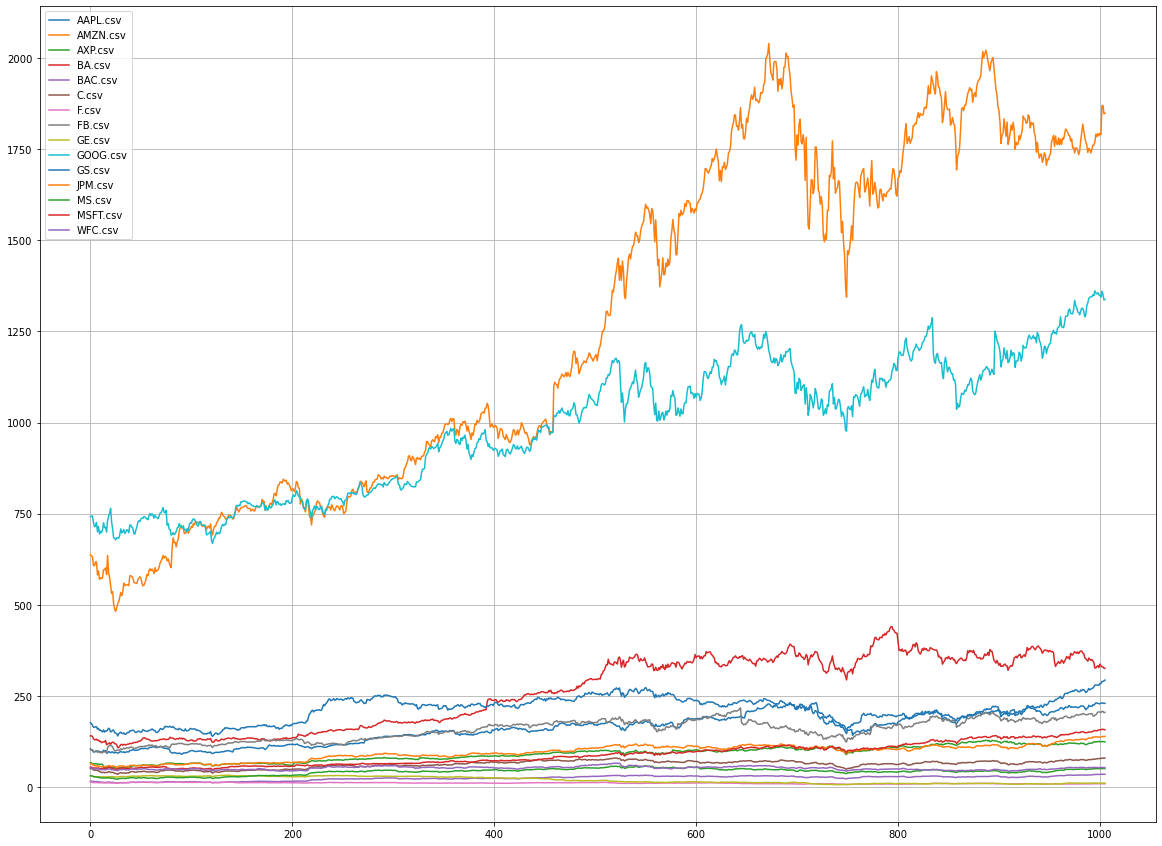

In [62]:
close_.plot(figsize=(20, 15), grid=True)

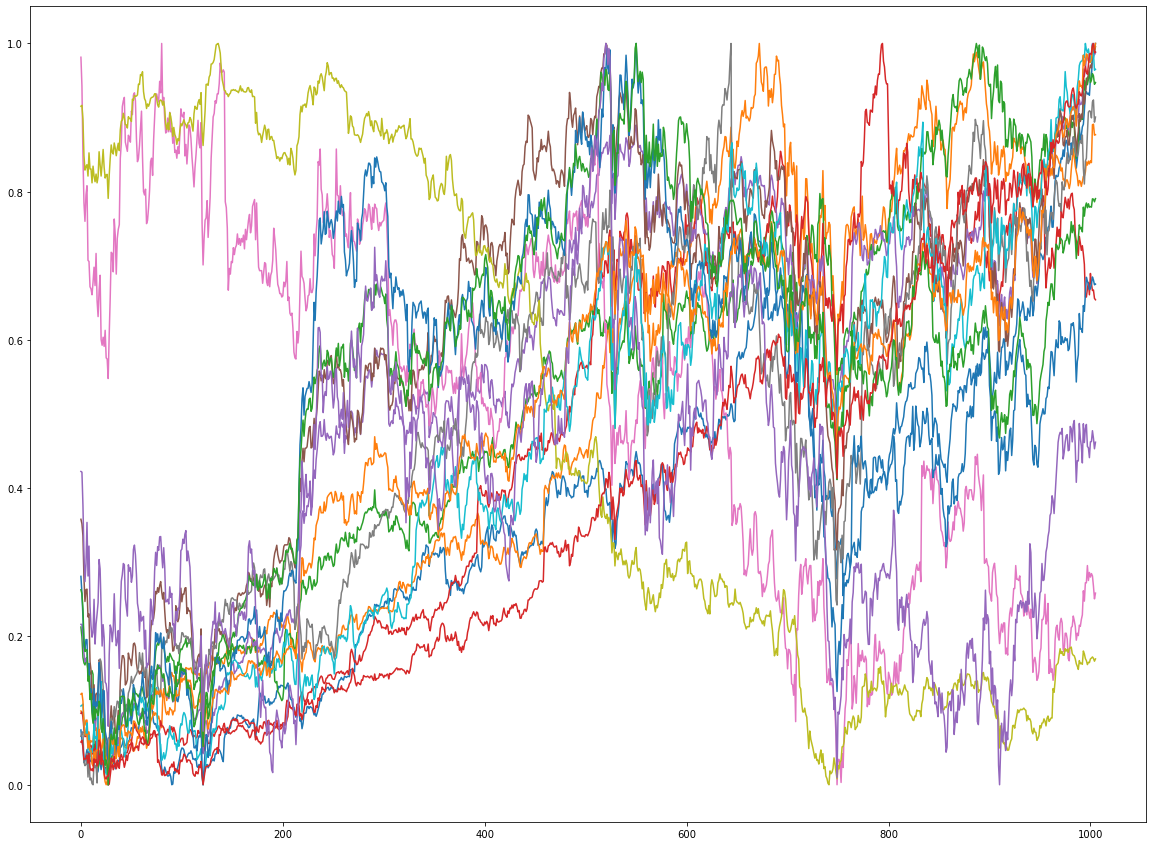

In [63]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
scaler = MinMaxScaler()
scaled = scaler.fit_transform(close_)
plt.figure(figsize=(20, 15))
plt.plot(scaled)

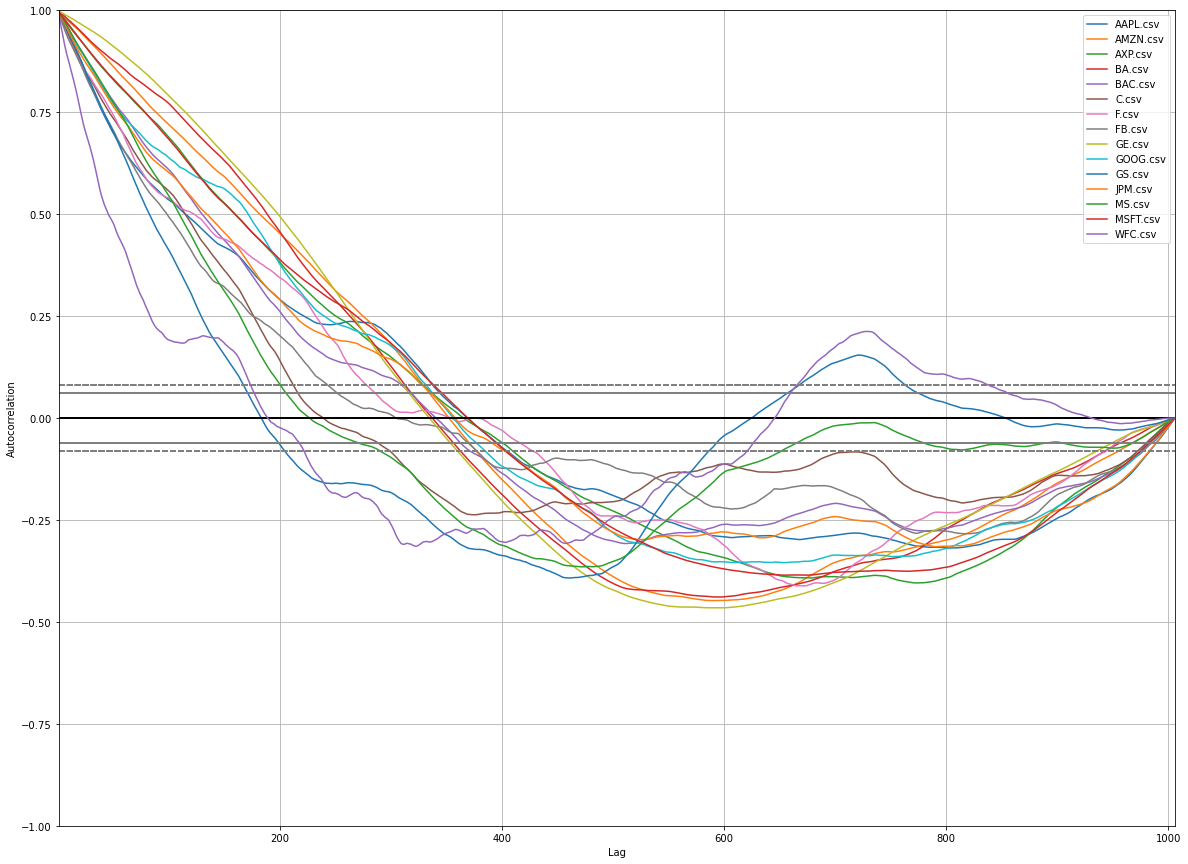

In [65]:
from pandas.plotting import autocorrelation_plot

plot.figure(figsize=(20, 15))

for tick, col in zip(t, range(len(scaled))):
    _ = autocorrelation_plot(scaled[:, col], label=tick)

_ = plot.legend(loc='upper right')

In [77]:
from pandas.plotting import scatter_matrix

dfs = [pd.DataFrame(df, columns=[tick]) for tick, df in zip(t, scaled)]

plot_frame = pd.concat(dfs, axis=0)
# _ = scatter_matrix(plot_frame, figsize=(20, 20), diagonal='kde')

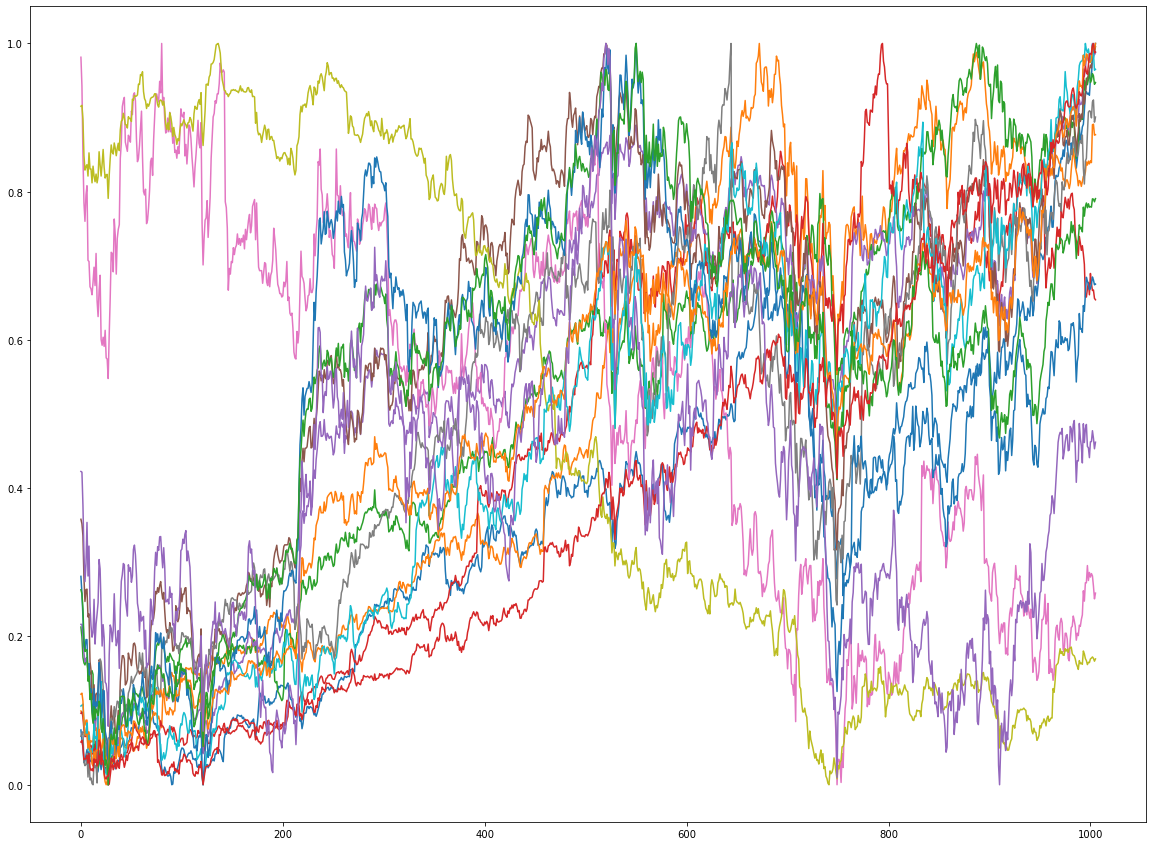

In [82]:
# plot_frame.plot(figsize=(20, 15), grid=True)

plt.figure(figsize=(20, 15))
plt.plot(scaled)

Index(['aizp_open_log', 'hig_open_log', 'ihc_open_log', 'jci_open_log',
       'lsi_open_log'],
      dtype='object')


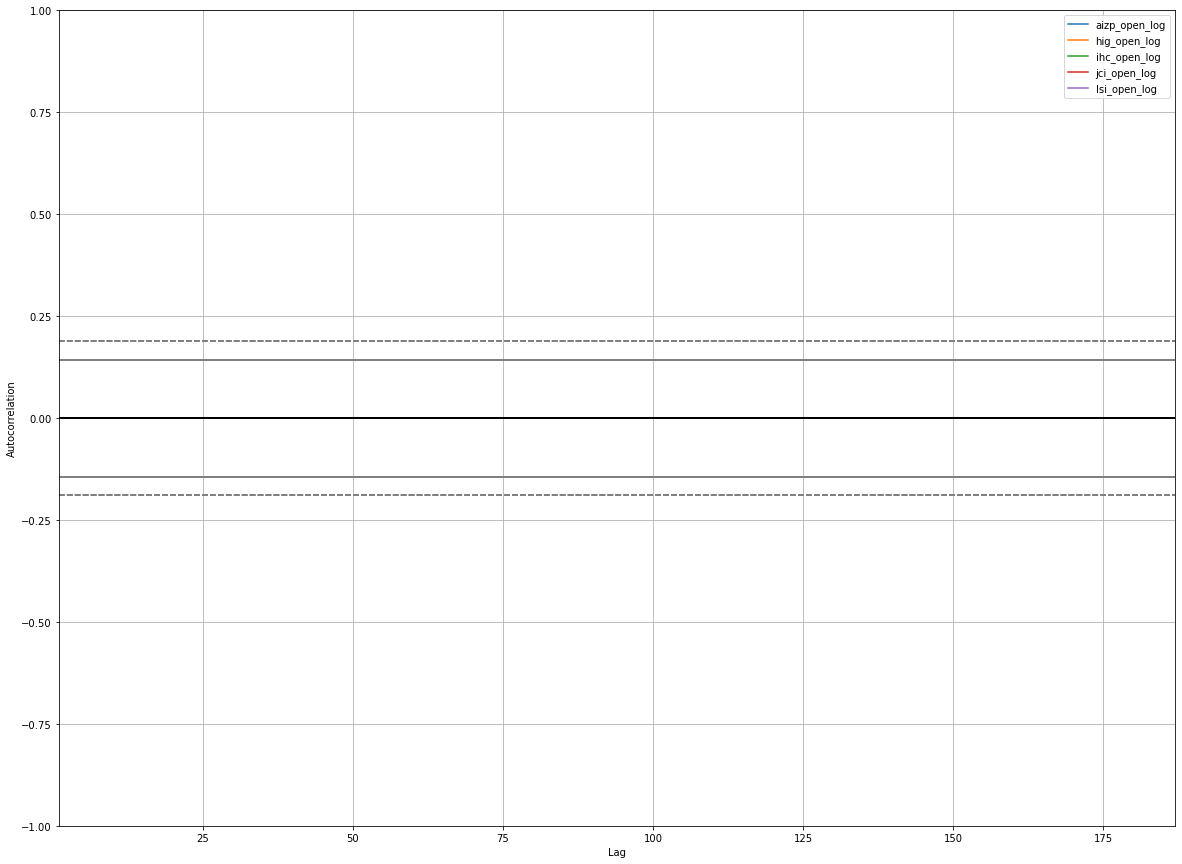

In [47]:
print(log_return.columns)

fig = plot.figure()
fig.set_figwidth(20)
fig.set_figheight(15)

_ = autocorrelation_plot(log_return['aizp_open_log'], label='aizp_open_log')
_ = autocorrelation_plot(log_return['hig_open_log'], label='hig_open_log')
_ = autocorrelation_plot(log_return['ihc_open_log'], label='ihc_open_log')
_ = autocorrelation_plot(log_return['jci_open_log'], label='jci_open_log')
_ = autocorrelation_plot(log_return['lsi_open_log'], label='lsi_open_log')

_ = plot.legend(loc='upper right')

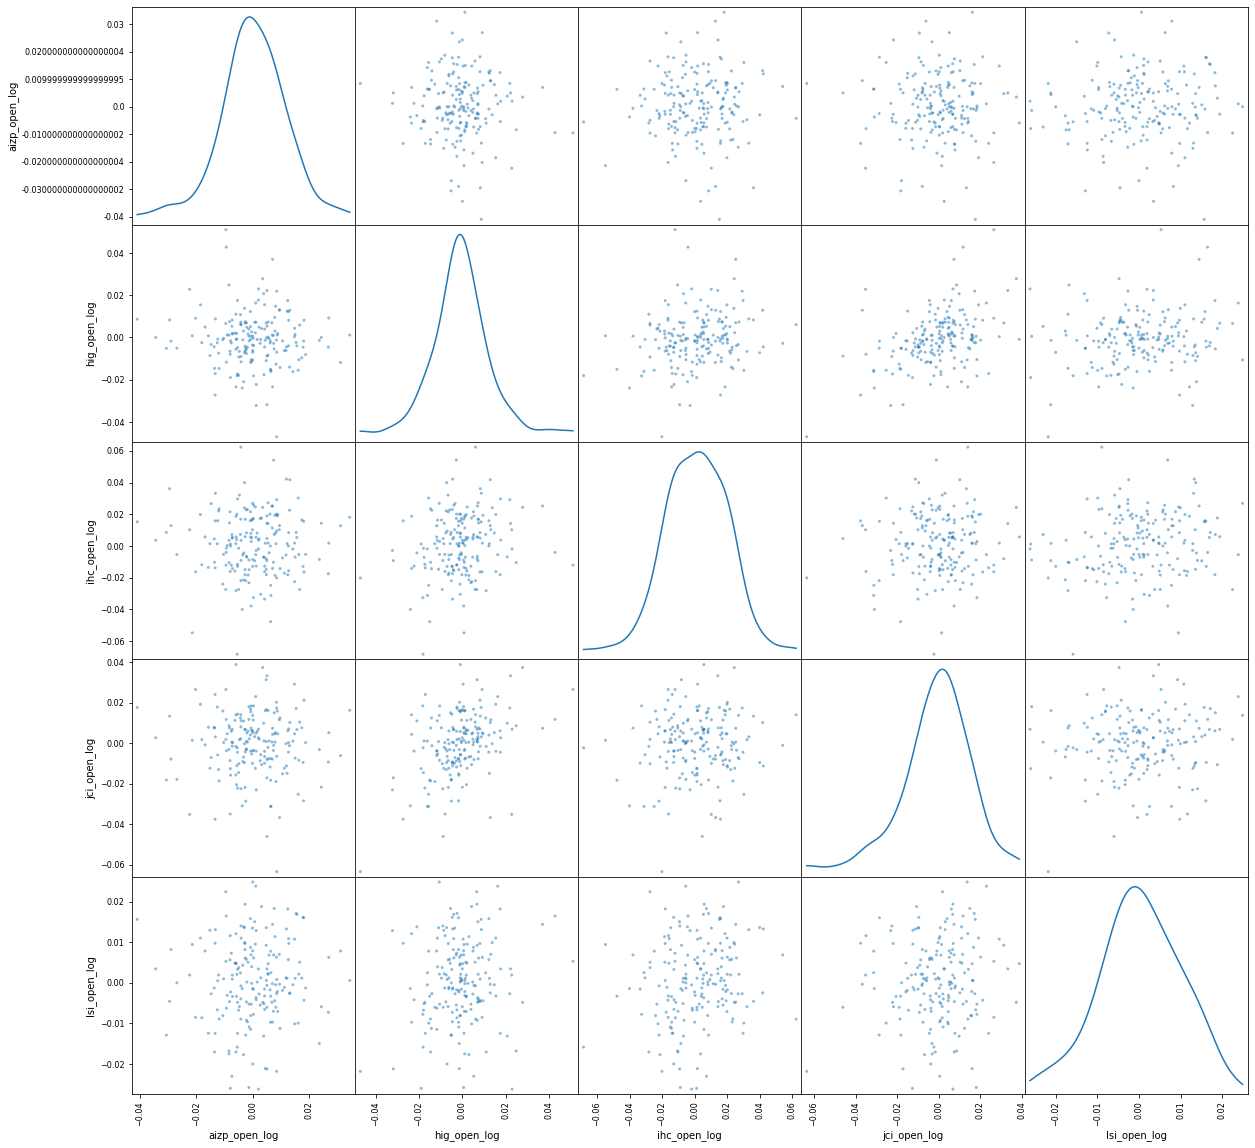

In [49]:
_ = scatter_matrix(log_return, figsize=(20, 20), diagonal='kde')

In [54]:
tmp = pd.DataFrame()
print(log_return.columns)
tmp['aizp'] = log_return['aizp_open_log']
tmp['hig'] = log_return['hig_open_log']
tmp['ihc'] = log_return['ihc_open_log']
tmp['jci'] = log_return['jci_open_log']
tmp['lsi'] = log_return['lsi_open_log']

tmp.corr()

Index(['aizp_open_log', 'hig_open_log', 'ihc_open_log', 'jci_open_log',
       'lsi_open_log'],
      dtype='object')


aizp       hig       ihc       jci       lsi
aizp  1.000000 -0.051104  0.006735 -0.026775  0.044959
hig  -0.051104  1.000000  0.190345  0.427606  0.144833
ihc   0.006735  0.190345  1.000000  0.081396  0.157179
jci  -0.026775  0.427606  0.081396  1.000000  0.085088
lsi   0.044959  0.144833  0.157179  0.085088  1.000000